# **Import libraries**

###All libraries required for the assignment are installed below.

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scipy
!pip3 install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



###All libraries needed for this assignment.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

###Read the csv file from the URL using the request libraried and then display the dataframe

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# **Question1: For the "Median value of owner-occupied homes" provide a boxplot**

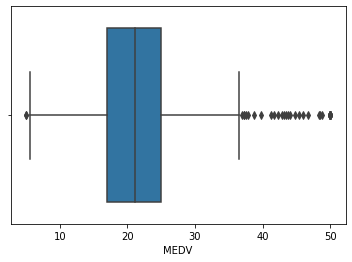

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(x='MEDV', data=boston_df)

# **Question2: Provide a  bar plot for the Charles river variable**

<Axes: xlabel='CHAS'>

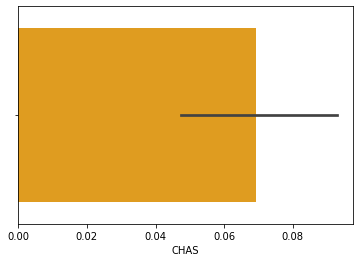

In [6]:
#Provide a  bar plot for the Charles river variable

sns.barplot(x = 'CHAS',  color = 'orange', data = boston_df)

# **Question3: Provide a boxplot for the MEDV variable vs the AGE variable.**
### Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

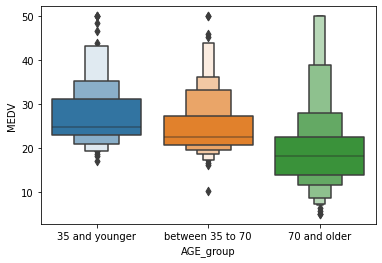

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
bins = [0, 35, 70, 140]
labels = ['35 and younger', 'between 35 to 70', '70 and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins = bins, labels = labels, right = False)
boston_df

ax = sns.boxenplot(x = 'AGE_group', y = 'MEDV', data = boston_df)

# ***Question4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. ***

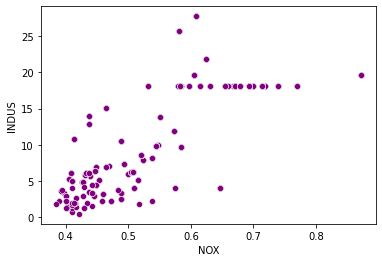

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', color = 'purple', data=boston_df)

# **Question 5: Create a histogram for the pupil to teacher ratio variable**

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

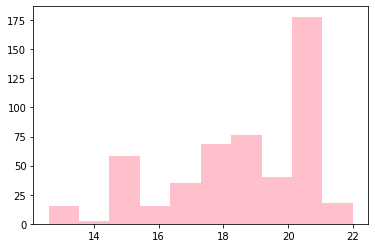

In [12]:
#Create a histogram for the pupil to teacher ratio variable
plt.hist(x = 'PTRATIO', color = 'pink', data = boston_df)

# **Question 6:Is there a significant difference in median value of houses bounded by the Charles river or not?**

### First, examine the equality of variance to check the significance of test.

In [18]:
#test variance equality
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

### Since the p-value is less than 0.05, the variance are not equal, for the purposes of this lab, we will move along.

###State the hypothesis

###* $H_0: µ_1 = µ_2$ ("Bounded by Charles river does **NOT** affect house value")
### * $H_1: µ_1 ≠ µ_2$ ("Bounded by Charles river affects house value")




In [13]:
#T-test for independent samples


scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

# Yet it is the requirement to ask me to use T-test compulsorily. 
# The result indicates that since the p = 7.390623170519905e-05 < 0.05
# We should reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by Charles river


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### **Conclusion**: Since the p-value is less than alpha value = 0.05, we reject the null hypothesis as there is enough proof that there is a stastical difference in median value of houses bounded by Charles river.

# ***Question 7:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? ***

### Test the equality of variance

In [19]:
#test the equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'between 35 to 70']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '70 and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

### Since pvalue=0.06295337343259205 is greater than 0.05, an ANOVA test is significant

###State the hypothesis
###* $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
###* $H_1:$ At least one of the means differs


In [14]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (
# ANOVA

# separate the data into variable
thirty_five_and_younger = boston_df[boston_df['AGE_group'] == '35 and younger']['MEDV']
thirty_five_to_seventy = boston_df[boston_df['AGE_group'] == 'between 35 to 70']['MEDV']
older_than_seventy =  boston_df[boston_df['AGE_group'] == '70 and older']['MEDV']

#run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_and_younger, thirty_five_to_seventy, older_than_seventy)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#since P-Value: 1.7105011022702984e-15 less than 0.05, we should reject the null hypothesis as there is enough evidences indicating that
# there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
 

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


###**Conclusion**: since P-Value: 1.7105011022702984e-15 less than 0.05, we should reject the null hypothesis as there is enough evidences indicating that there is a difference  in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).



# ***Question 8:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? ***



In [15]:
#Pearson Correlation

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#since pvalue=7.913361061238693e-98 is less than 0.05,
# we should reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

### **Conclusion**: since pvalue=7.913361061238693e-98 is less than 0.05, we should reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#**Question 8: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?** 


In [17]:

# Regression analysis

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
# p = 1.21e-08 < alpha = 0.05, 
# reject H0-> an additional weighted distance affect the median value of owner occupied homes




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        13:35:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###**Conclusion**: since p = 1.21e-08 < alpha = 0.05, we reject the null hypothesis, which means an additional weighted distance affect the median value of owner occupied homes

